In [101]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import homogeneity_score

In [102]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [103]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')
data_label =  open('/home/shobhit/NewDataset/UCI HAR Dataset/train/y_train.txt')

In [104]:
lines = data.readlines()
len(lines)

7352

In [105]:
lines[1]

'  2.7841883e-001 -1.6410568e-002 -1.2352019e-001 -9.9824528e-001 -9.7530022e-001 -9.6032199e-001 -9.9880719e-001 -9.7491437e-001 -9.5768622e-001 -9.4306751e-001 -5.5785126e-001 -8.1840869e-001  8.4930787e-001  6.8584458e-001  8.2263681e-001 -9.8193011e-001 -9.9999130e-001 -9.9978838e-001 -9.9840537e-001 -9.9915036e-001 -9.7786550e-001 -9.4822478e-001 -7.1489166e-001 -5.0093000e-001 -5.7097906e-001  6.1162716e-001 -3.2954862e-001  2.8421321e-001  2.8459454e-001  1.1570542e-001 -9.0962529e-002  2.9431041e-001 -2.8121057e-001  8.5988430e-002 -2.2152694e-002 -1.6656535e-002 -2.2064350e-001 -1.3428663e-002 -7.2691890e-002  5.7938169e-001  9.6656113e-001 -1.4155127e-001  1.0937881e-001 -9.9741134e-001 -9.8944741e-001 -9.3163868e-001 -9.9788359e-001 -9.8961366e-001 -9.3324040e-001  8.9206031e-001 -1.6134256e-001  1.2258573e-001  9.8452014e-001 -1.1489334e-001  1.0276411e-001 -3.8342955e-001  9.0782890e-001 -9.7058275e-001 -9.7850045e-001 -9.9918838e-001 -9.9002851e-001 -9.4168540e-001 -1.000

In [106]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [107]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [108]:
label_lines=data_label.readlines()

In [109]:
len(label_lines)

7352

In [110]:
label_lines[1]

'5\n'

In [111]:
new_label_lines=[]
for i,line in enumerate(label_lines):
    temp = line.strip('\n')
    a=[int(e)-1 for e in temp.split(',')]
    new_label_lines.append(a[0])

In [112]:
true_labels = np.array(new_label_lines)
#true_labels=true_labels.T

In [113]:
true_labels.shape

(7352,)

In [114]:
pca = PCA(n_components=4)
pca.fit(z)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [115]:
print(pca.explained_variance_ratio_)

[0.6255444  0.04913023 0.04121467 0.01874956]


In [116]:
sample = pca.transform(z)

**Elbow using Cosine distance**

In [117]:
homogenity={}
K = range(1,10)
for k in K :
    homogenity[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    print(labels)
    print(true_labels)
    #print(sample_transformed)
    homogenity[k]= homogeneity_score(true_labels,labels)
    print("score ="+str(homogenity[k]))

[0 0 0 ... 0 0 0]
[4 4 4 ... 1 1 1]
score =-3.111825880605261e-16
[1 1 1 ... 0 0 0]
[4 4 4 ... 1 1 1]
score =0.38005095079194606
[1 1 1 ... 2 2 2]
[4 4 4 ... 1 1 1]
score =0.40087062718812794
[0 0 0 ... 2 2 2]
[4 4 4 ... 1 1 1]
score =0.5857064419136997
[1 1 1 ... 0 0 0]
[4 4 4 ... 1 1 1]
score =0.5634920652675329
[0 0 0 ... 4 4 4]
[4 4 4 ... 1 1 1]
score =0.5724614668539153
[2 2 2 ... 5 5 5]
[4 4 4 ... 1 1 1]
score =0.5982384259202557
[5 5 5 ... 6 6 6]
[4 4 4 ... 1 1 1]
score =0.6102795702803581
[1 1 1 ... 0 0 0]
[4 4 4 ... 1 1 1]
score =0.62409930102781


In [118]:
SSE_array=[]
slope=[]
for key,value in homogenity.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
#slope

[-3.111825880605261e-16, 0.38005095079194606, 0.40087062718812794, 0.5857064419136997, 0.5634920652675329, 0.5724614668539153, 0.5982384259202557, 0.6102795702803581, 0.62409930102781]


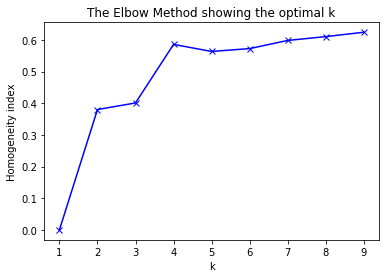

In [119]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('k')
plt.ylabel('Homogeneity index')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [120]:
slope

[[2, 0.3800509507919464],
 [3, 0.020819676396181874],
 [4, 0.18483581472557176],
 [5, -0.022214376646166767],
 [6, 0.008969401586382375],
 [7, 0.025776959066340366],
 [8, 0.012041144360102396],
 [9, 0.013819730747451908]]

In [121]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 2
Optimal Number of Clusters = 4
Optimal Number of Clusters = 5
Optimal Number of Clusters = 7
